# Practical Exam (DAA+ML)
1. Name    : Vaibhav Sanjay Bichave
2. Class   : TE 10 (L-10) 
3. Roll No.: 33209

Every year many students give the GRE exam to get admission in foreign Universities. The
dataset contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out
of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.

Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions.

The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So, to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.

1. Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
2. Perform data-preparation (Train-Test Split)
3. Apply Machine Learning Algorithm
4. Evaluate Model.



In [1]:
#importing required libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading Data

In [2]:
#loading dataset into dataframe

data = pd.read_csv("Admission_Predict.csv")

In [3]:
# first 5 instances of dataframe

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# last 5 instances of dataframe

data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


## 2. Familiarizing with Data

In [5]:
# Shape of dataframe

data.shape

(400, 9)

In [6]:
# columns in dataframe

data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
#info about dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
#describtion of dataframe

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# nunique in dataframe

data.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [10]:
# droping serial no. feature

data = data.drop("Serial No.", axis =1)

In [11]:
# Applying lambda function on "Chance of Admit"

data["Chance of Admit "] = data["Chance of Admit "].apply(lambda x:1 if x>0.5 else 0)

In [12]:
# checking dataframe

data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


In [13]:
# calculating total Count
data_admit = data[data["Chance of Admit "]==1]
data_non_admit = data[data["Chance of Admit "]==0]
print("Admitted count  :",data_admit.shape[0])
print("Non - Admitted count  :",data_non_admit.shape[0])

Admitted count  : 365
Non - Admitted count  : 35


In [14]:
# checking for missing value

data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### OBSERVATION
1. There are 400 instances and 9 features intially.
2. All features are numerical in nature.
3. There are no missing or null value in dataset.
4. We apply lambda fuction to classify them into 0's and 1's

## 3. Visualizing Data

In [15]:
# Correlation among data

data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.390875
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.393121
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.279316
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.285939
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.353341
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.455949
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.216193
Chance of Admit,0.390875,0.393121,0.279316,0.285939,0.353341,0.455949,0.216193,1.000000


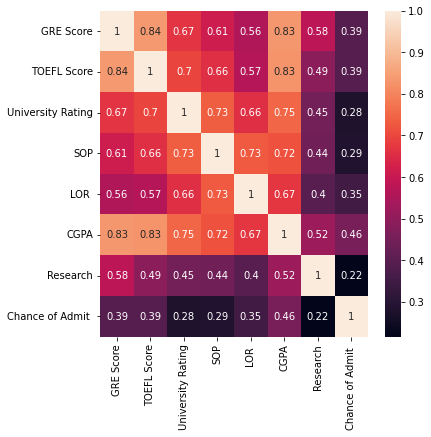

In [16]:
# Correlation heatmap

plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot = True);

There is very low correlation among "Chance of Admit" and other feature.

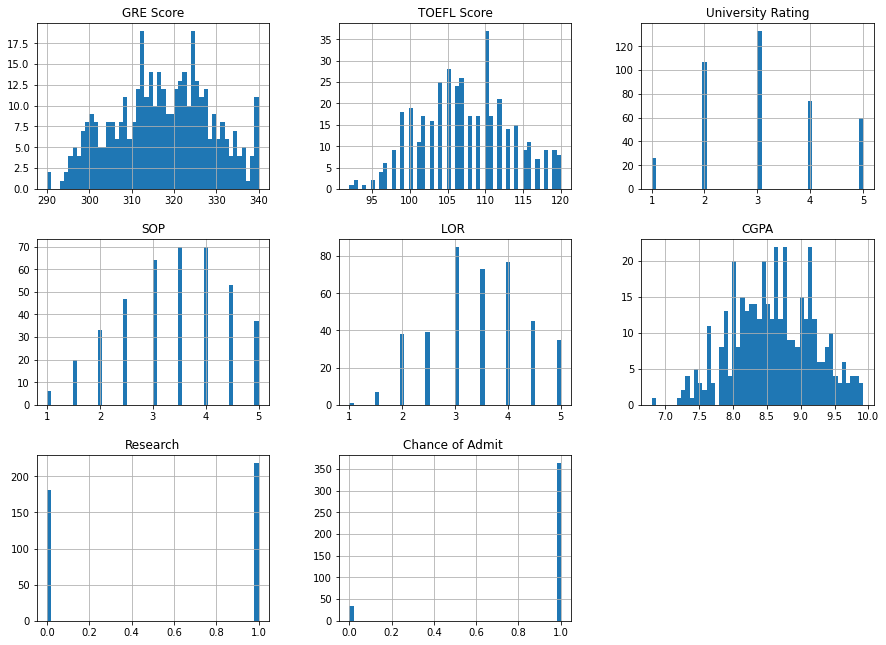

In [17]:
# histogram for each feature

data.hist(bins = 50 ,figsize=(15,11));

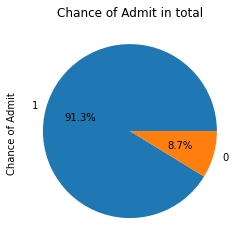

In [18]:
# pie chart for "Chance of Admit"

data["Chance of Admit "].value_counts().plot(kind = "pie",autopct="%1.1f%%")
plt.title("Chance of Admit in total");


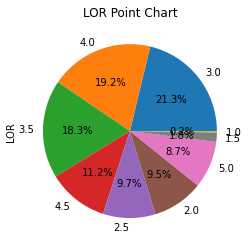

In [19]:
# pie chart for "LOR"
 
data["LOR "].value_counts().plot(kind = "pie",autopct="%1.1f%%")
plt.title("LOR Point Chart");

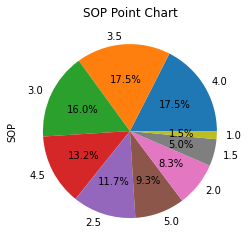

In [20]:
# pie chart for "SOP"
 
data["SOP"].value_counts().plot(kind = "pie",autopct="%1.1f%%")
plt.title("SOP Point Chart");

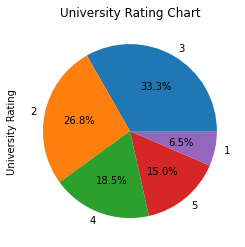

In [21]:
# pie chart for "University Ratting"
 
data["University Rating"].value_counts().plot(kind = "pie",autopct="%1.1f%%")
plt.title("University Rating Chart");


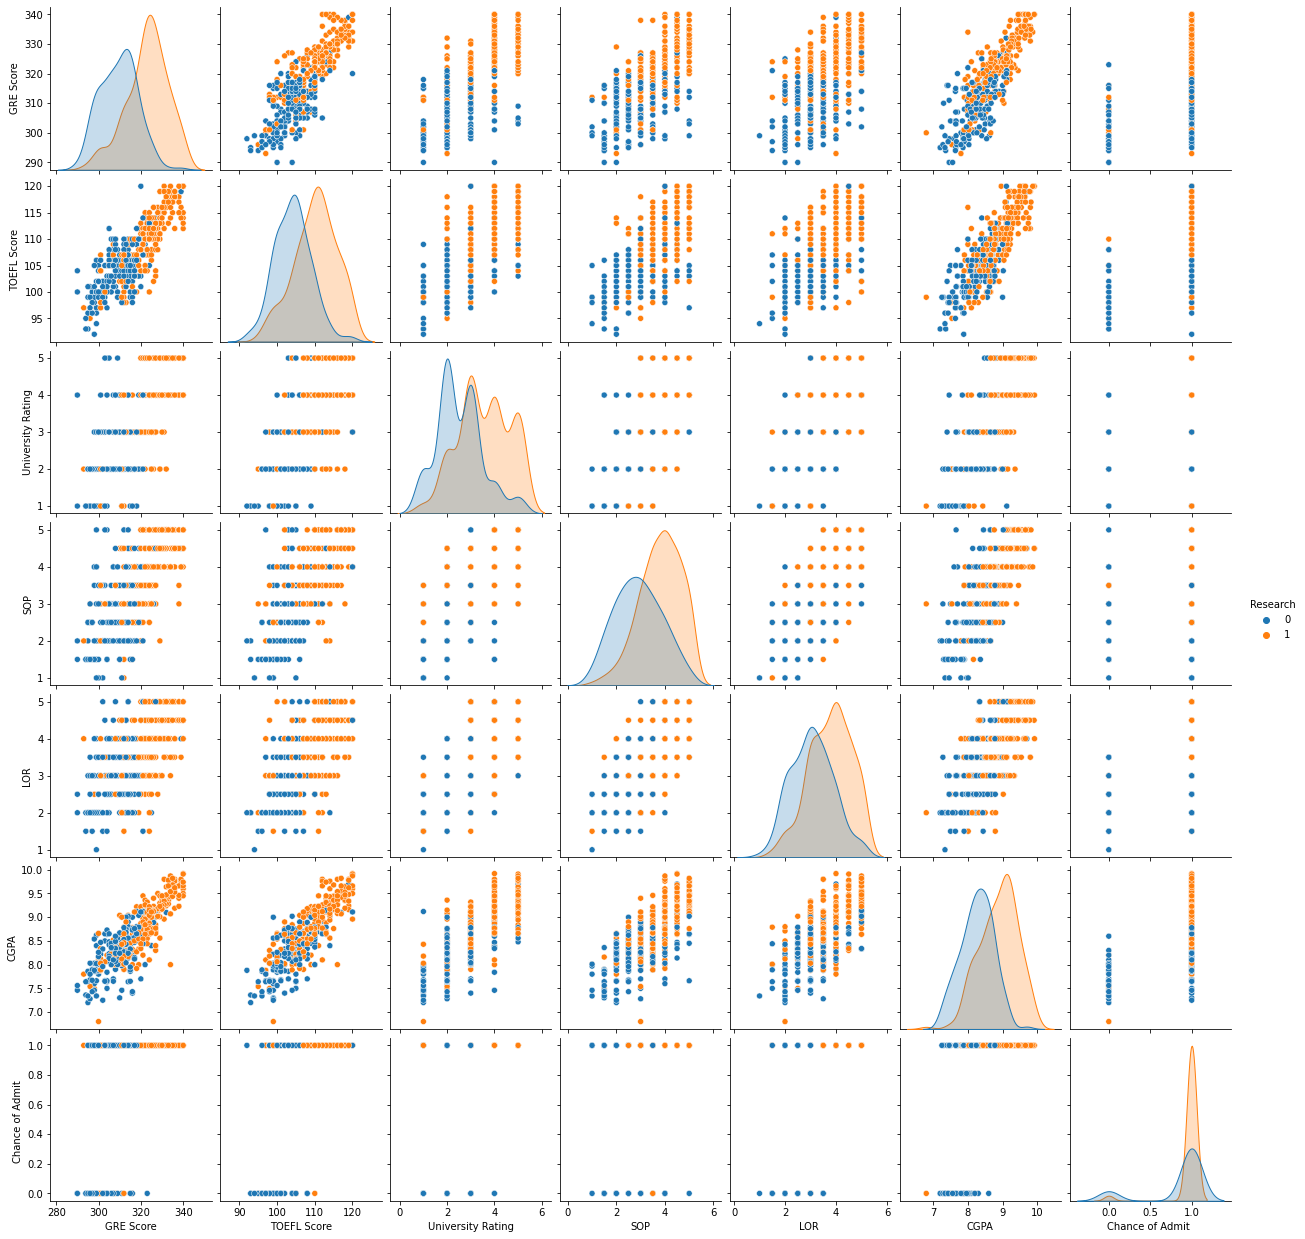

In [22]:
sns.pairplot(data, hue ="Research");

## 4. Splitting of Data

In [23]:
# dependent and independent feature

X = data.drop("Chance of Admit ", axis = 1)
y = data["Chance of Admit "]

In [24]:
# unique in independent feature

X.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
dtype: int64

In [25]:
# spitting the dataset into train and test sets : 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# shape of train test split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


## 5. Model Training and Testing 

In [26]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier()

#fit the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
# predicting the target vaule from the model for samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [28]:
# computing accuracy of model 

from sklearn.metrics import accuracy_score
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree : Accuracy on Training Data {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on Testing Data {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on Training Data 1.000
Decision Tree : Accuracy on Testing Data 0.863


In [29]:
# computing classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_tree))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.92      0.93      0.92        70

    accuracy                           0.86        80
   macro avg       0.68      0.66      0.67        80
weighted avg       0.86      0.86      0.86        80



In [30]:
from sklearn import metrics

print("1. Accuracy   : {:.3f}".format(metrics.accuracy_score(y_test,y_test_tree)))
print("2. Precision  : {:.3f}".format(metrics.precision_score(y_test,y_test_tree)))
print("3. Recall     : {:.3f}".format(metrics.recall_score(y_test,y_test_tree)))
print("4. f1 score   : {:.3f}".format(metrics.f1_score(y_test,y_test_tree)))

1. Accuracy   : 0.863
2. Precision  : 0.915
3. Recall     : 0.929
4. f1 score   : 0.922


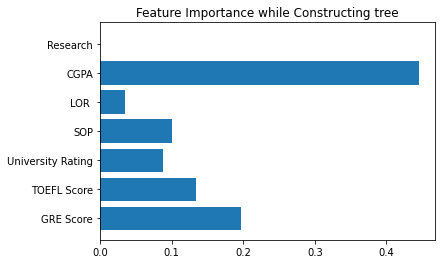

In [31]:
# Feature Importance while Constructing tree

plt.barh(X.columns,tree.feature_importances_)
plt.title("Feature Importance while Constructing tree");

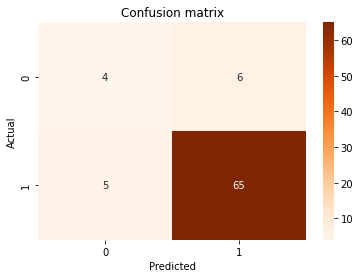

In [32]:
# visualization of Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_tree)
sns.heatmap(cm,annot = True,cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix");

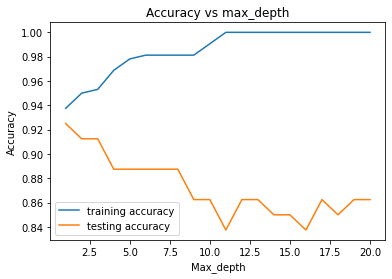

In [33]:
# checking for best value of max_depth

training_accuracy = []
testing_accuracy = []

# try max_depth from 1 to 20
depth = range(1,21)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)
    tree_test.fit(X_train,y_train)
    
    #record accuracy 
    training_accuracy.append(tree_test.score(X_train,y_train))
    testing_accuracy.append(tree_test.score(X_test,y_test))

#plotting the training & testing accuracy for max_depth 1 to 20
plt.plot(depth,training_accuracy,label ="training accuracy")
plt.plot(depth,testing_accuracy,label ="testing accuracy")
plt.title("Accuracy vs max_depth")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();


In [34]:
# text_representation of tree

from sklearn.tree import export_text
tree = DecisionTreeClassifier(max_depth =1)

tree.fit(X_train,y_train)
text_representation  = export_text(tree)
print(text_representation)

|--- feature_5 <= 7.66
|   |--- class: 0
|--- feature_5 >  7.66
|   |--- class: 1



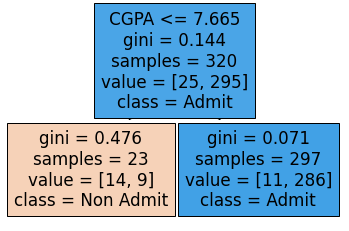

In [35]:
# visualization of tree

import sklearn.tree as tr
tr.plot_tree(tree,feature_names=X.columns,class_names=np.array(["Non Admit","Admit"]),filled=True);

## 6.Conclusion:
1. We have succesfully classify the admitted or not admitted based on the given feature using Decision tree model.
2. Chance of Admit is greater the chance of non-admit.
3. Accuracy comes tobe 85% on testing dataset.
4. As we increases the the max_depth accuracy fluctuate between 84% to 88%
5. "CGPA" has more importance while decising the chance of admit.
